<a href="https://colab.research.google.com/github/kaiquefreire05/analise-ocorrencias-criminais-gov/blob/main/an%C3%A1lise_ocorr%C3%AAncias_criminais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisando ocorrências criminais por UF (Unidade de federação)

A violência e a criminalidade são problemas complexos que afetam a sociedade brasileira há décadas. Esses problemas têm consequências graves para a vida das pessoas, incluindo perdas humanas, danos materiais e prejuízos econômicos.

Para compreender melhor esses problemas e desenvolver políticas públicas mais eficazes para combatê-los, é importante realizar análises de dados.

Neste projeto, vamos analisar um dataset de ocorrências criminais por unidade federativa no Brasil.

A análise dos dados nos permitirá:

* Identificar tendências e padrões de criminalidade no Brasil;

* Comparar a situação de diferentes unidades federativas em relação à criminalidade;

* Propor hipóteses sobre os fatores que podem contribuir para a criminalidade;

* Avaliar a eficácia de políticas públicas de segurança pública.

# Coleta dos dados

O dataset foi disponibilizado pelo Ministério da Justiça e Segurança Pública e contém informações sobre o número de ocorrências, natureza do fato registrado, perfil da vítima, perfil do autor, meios empregados, dentre outras.

Link dos dados: https://dados.gov.br/dados/conjuntos-dados/sistema-nacional-de-estatisticas-de-seguranca-publica

# Objetivos

Os objetivos deste projeto são:

* Identificar as principais tendências e padrões de criminalidade no Brasil;

* Comparar a situação de diferentes unidades federativas em relação à criminalidade;

* Identificar fatores que podem contribuir para a criminalidade.

# Primeiros passos

## Importando bibliotecas que serão usadas

In [ ]:
# Bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt

## Fazendo a leitura da base de dados

In [ ]:
# Fazendo leitura da base de dados
df = pd.read_excel('/content/drive/MyDrive/datasets/indicadoressegurancapublicauf.xlsx')

## Primeiras interações com a base de dados

In [ ]:
# Verificando as 5 primeiras linhas
df.head()

,UF,Tipo Crime,Ano,Mês,Ocorrências
0,Acre,Estupro,2022,janeiro,31
1,Acre,Furto de veículo,2022,janeiro,50
2,Acre,Homicídio doloso,2022,janeiro,10
3,Acre,Lesão corporal seguida de morte,2022,janeiro,1
4,Acre,Roubo a instituição financeira,2022,janeiro,0


In [ ]:
# Verificando as 5 últimas linhas
df.tail()

,UF,Tipo Crime,Ano,Mês,Ocorrências
23015,Tocantins,Roubo a instituição financeira,2015,dezembro,6
23016,Tocantins,Roubo de carga,2015,dezembro,1
23017,Tocantins,Roubo de veículo,2015,dezembro,55
23018,Tocantins,Roubo seguido de morte (latrocínio),2015,dezembro,2
23019,Tocantins,Tentativa de homicídio,2015,dezembro,42


In [ ]:
# Visualizando o tamanho da base de dados
df.shape

(23020, 5)

# Visualização e descrição das colunas

In [ ]:
# Verificando nome das colunas
df.columns

Index(['UF', 'Tipo Crime', 'Ano', 'Mês', 'Ocorrências'], dtype='object')

In [ ]:
# Verificando o tipo de variável que a coluna armazena
df.dtypes

UF             object
Tipo Crime     object
Ano             int64
Mês            object
Ocorrências     int64
dtype: object

### Descrição:

**DF**

* `Tipo de dado:` objeto
* `Descrição`: Referente as 27 Unidades Federativas, sendo os 26 Estados acrescidos do Distrito Federal(DF), que é o local onde fica a capital do país.

**Tipo Crime**

* `Tipo de dado:` objeto
* `Descrição:` Representa o tipo de crime registrado na ocorrência. Os valores possíveis são os códigos dos crimes definidos pelo Código Penal Brasileiro.

**Ano**

* `Tipo de dado:` inteiro
* `Descrição:` Representa o ano da ocorrência criminal.

**Mês**

* `Tipo de dado:` objeto
* `Descrição:` Representa o mês da ocorrência criminal. Os valores possíveis são os nomes dos 12 meses do ano.

**Ocorrências**

* `Tipo de dado:` inteiro
* `Descrição:` Representa o número de ocorrências criminais registradas no mês e na unidade federativa especificados.

# Começando a análise dos dados

## Verificando o intervalo de tempo da base de dados

In [ ]:
# Verificando a quantidade de anos que serão analisados
df['Ano'].unique()

array([2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015])

## Conferindo as unidades federativas

In [ ]:
df['UF'].unique

<bound method Series.unique of 0             Acre
1             Acre
2             Acre
3             Acre
4             Acre
           ...    
23015    Tocantins
23016    Tocantins
23017    Tocantins
23018    Tocantins
23019    Tocantins
Name: UF, Length: 23020, dtype: object>

## Verificando se existe valores ausentes

In [ ]:
df.isnull().sum()

UF             0
Tipo Crime     0
Ano            0
Mês            0
Ocorrências    0
dtype: int64

## Verificando os tipos de crimes

In [ ]:
df['Tipo Crime'].unique()

array(['Estupro', 'Furto de veículo', 'Homicídio doloso',
       'Lesão corporal seguida de morte',
       'Roubo a instituição financeira', 'Roubo de carga',
       'Roubo de veículo', 'Roubo seguido de morte (latrocínio)',
       'Tentativa de homicídio'], dtype=object)

# Começando a visualização dos dados

## Classificação de crimes com mais ocorrências nos últimos anos

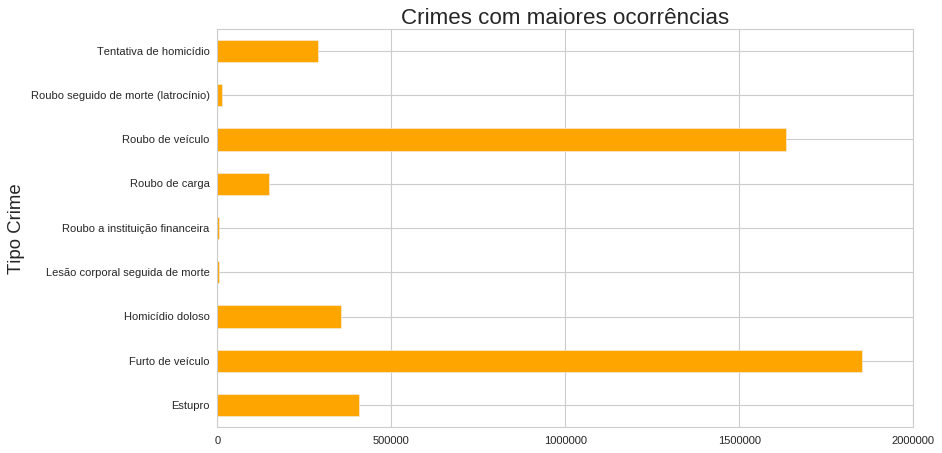

In [ ]:
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(10, 6))
df.groupby(['Tipo Crime'])['Ocorrências'].sum().plot.barh(title='Crimes com maiores ocorrências', color='orange');

In [ ]:
df.groupby(['Tipo Crime'])['Ocorrências'].sum().sort_values(ascending=False)

Tipo Crime
Furto de veículo                       1851837
Roubo de veículo                       1633495
Estupro                                 406831
Homicídio doloso                        354868
Tentativa de homicídio                  289959
Roubo de carga                          148342
Roubo seguido de morte (latrocínio)      14263
Lesão corporal seguida de morte           6100
Roubo a instituição financeira            5298
Name: Ocorrências, dtype: int64

* `Furto de veículo`: 1.851.837
* `Roubo de veículo`: 1.633.495
* `Estupro`:  406.831
* `Homicídio doloso`:  354.868
* `Tentativa de homicídio`:  289.959
* `Roubo de carga`:  148.342
* `Roubo seguido de morte (latrocínio)`:  14.263
* `Lesão corporal seguida de morte`:  6.100
* `Roubo a instituição financeira`:  5.298

## Qual foi o ano com o maior e menor números de ocorrências?

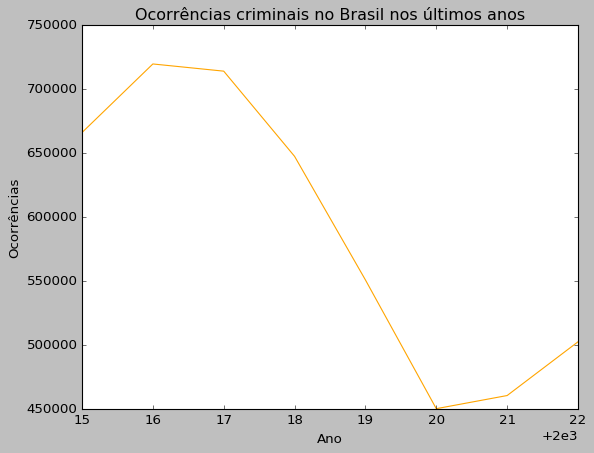

In [ ]:
plt.style.use('classic')
df.groupby(df['Ano'])['Ocorrências'].sum().plot(title='Ocorrências criminais no Brasil nos últimos anos', color='orange')
plt.ylabel('Ocorrências');

A análise das ocorrências nos últimos anos mostra que o ano com mais registros foi 2016, com mais de 700 mil ocorrências. O ano com menos registros foi 2020, com cerca de 450 mil ocorrências.

A seguir, será apresentado um gráfico que mostra a distribuição das
ocorrências por mês no de 2016.

## Distribuição mensal de ocorrências criminais no Brasil em 2016, ano com maior índice de criminalidade.

In [ ]:
# Criando uma variável que irá receber dados apenas do ano de 2016
df_2016 = df[df['Ano'] == 2020]

In [ ]:
# Confirmando para ver se existe apenas registros do ano de 2016
df_2016['Ano'].unique()

array([2020])

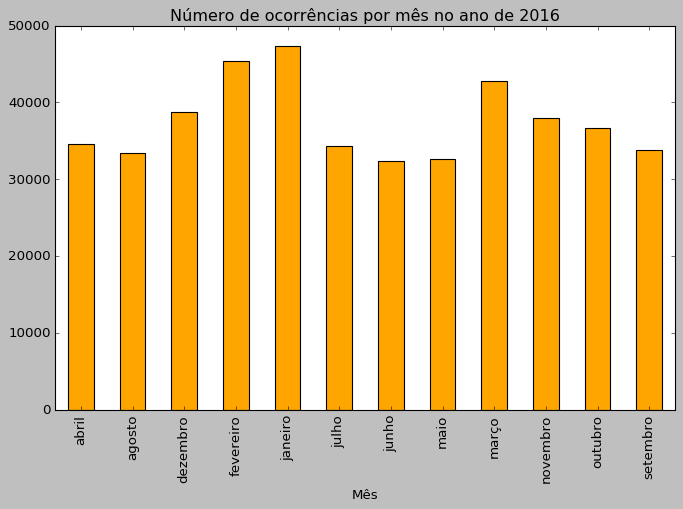

In [ ]:
plt.figure(figsize=(10, 6))
df_2016.groupby(['Mês'])['Ocorrências'].sum().plot.bar(title='Número de ocorrências por mês no ano de 2016', color='orange');

###Ocorrências criminais por mês no ano de 2016
* `Janeiro`: 47.347
* `Fevereiro`: 45.359
* `Março`: 42.812
* `Abril`: 34.636
* `Maio`: 32.593
* `Junho`: 32.427
* `Julho`: 34.292
* `Agosto`: 33.479
* `Setembro`: 33.843
* `Outubro`: 36.711
* `Novembro`: 37.940
* `Dezembro`: 38.815

## Tendência de homicídios dolosos por UF ao longo dos últimos 5 anos.

In [ ]:
# Criando uma base de dados que recebe apenas homicidios dolosos
df_homicidio_doloso = df[df['Tipo Crime'] == 'Homicídio doloso']

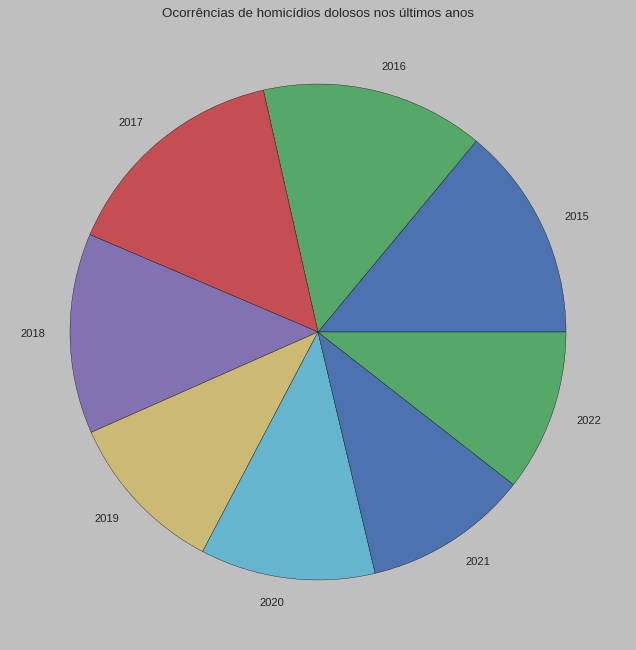

In [ ]:
plt.figure(figsize=(10, 10))
plt.style.use('seaborn-v0_8')
df_homicidio_doloso.groupby(['Ano'])['Ocorrências'].sum().plot.pie(title='Ocorrências de homicídios dolosos nos últimos anos')
plt.ylabel('');

In [ ]:
# Homicidios dolosos em números
df_homicidio_doloso.groupby(['Ano'])['Ocorrências'].sum().sort_values()

Ano
2022    37439
2019    37847
2021    38137
2020    40470
2018    46321
2015    49628
2016    51645
2017    53381
Name: Ocorrências, dtype: int64

### Homicídios dolosos nos últimos anos em números

* `2015`: 49.628
* `2016`: 51.645
* `2017`: 53.381
* `2018`: 46.321
* `2019`: 37.847
* `2020`: 40.470
* `2021`: 38.137
* `2022`: 37.439

De acordo com o gráfico e os números apresentados, o ano com o maior número de homicídios dolosos no Brasil foi 2017, com 53.381 ocorrências. Em 2022, o número de homicídios caiu para 37.439, o menor valor registrado desde o início da série histórica.

## Roubo de veículos: comparação por UF em 2022

In [ ]:
# Criando uma nova base de dados que recebe apenas crimes de roubo de veículos no de 2022
df_roubo_2022 = df.loc[(df['Tipo Crime'] == 'Roubo de veículo') & (df['Ano'] == 2022)]

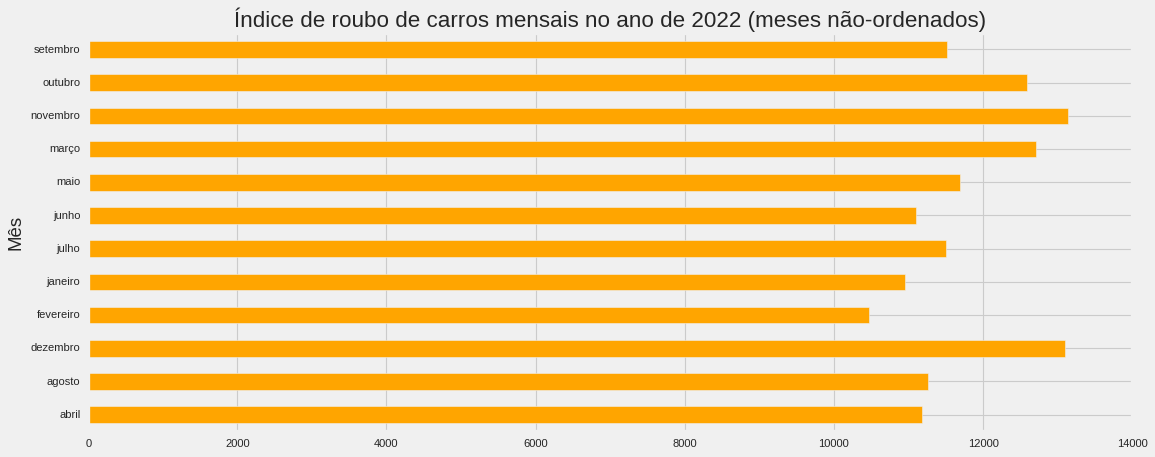

In [ ]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15, 6))
df_roubo_2022.groupby(['Mês'])['Ocorrências'].sum().plot.barh(title='Índice de roubo de carros mensais no ano de 2022 (meses não-ordenados)', color='orange');

In [ ]:
df_roubo_2022.groupby(['Mês'])['Ocorrências'].sum()

Mês
abril        11185
agosto       11268
dezembro     13096
fevereiro    10476
janeiro      10953
julho        11502
junho        11102
maio         11692
março        12709
novembro     13135
outubro      12590
setembro     11519
Name: Ocorrências, dtype: int64

###Número de ocorrências de roubo de carros no ano de 2022
* `Janeiro`: 10.953
* `Fevereiro`: 10.476
* `Março`: 12.709
* `Abril`: 11.185
* `Maio`: 11.692
* `Junho`: 11.102
* `Julho`: 11.502
* `Agosto`: 11.268
* `Setembro`: 11.519
* `Outubro`: 12.590
* `Novembro`: 13.135
* `Dezembro`: 13.096

## Número de ocorrências de estupro nos últimos anos

In [ ]:
# Criando uma variável que recebe apenas crime de estrupo nos últimos anos
df_estr = df[df['Tipo Crime'] == 'Estupro']
df_estr.head()

,UF,Tipo Crime,Ano,Mês,Ocorrências
0,Acre,Estupro,2022,janeiro,31
9,Acre,Estupro,2022,fevereiro,34
18,Acre,Estupro,2022,março,57
27,Acre,Estupro,2022,abril,28
32,Acre,Estupro,2022,maio,45


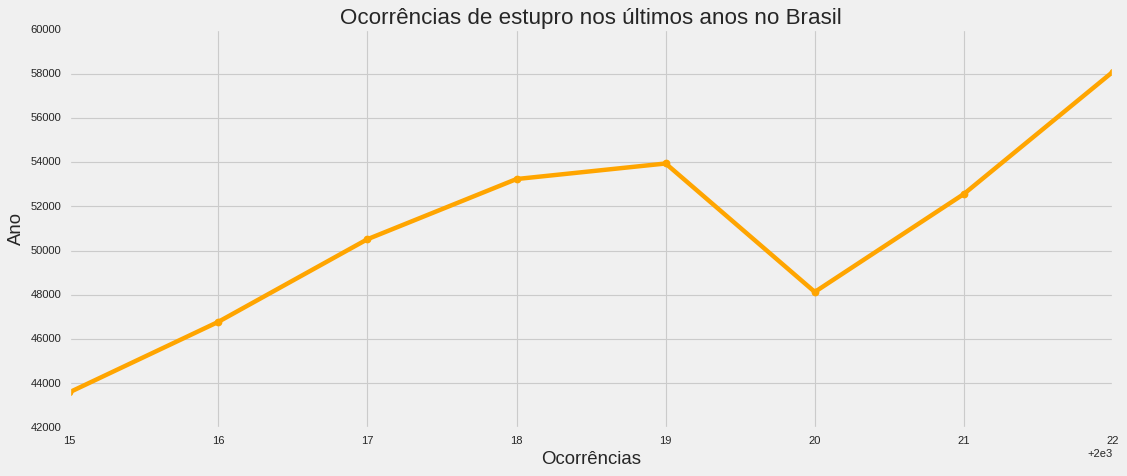

In [ ]:
# Ocorrências de estupro nos últimos anos
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15, 6))
df_estr.groupby(df_estr['Ano'])['Ocorrências'].sum().plot(marker='o', title='Ocorrências de estupro nos últimos anos no Brasil', color='orange')
plt.xlabel('Ocorrências')
plt.ylabel('Ano');

In [ ]:
df_estr.groupby(df_estr['Ano'])['Ocorrências'].sum()

Ano
2015    43591
2016    46779
2017    50513
2018    53233
2019    53936
2020    48132
2021    52560
2022    58087
Name: Ocorrências, dtype: int64

In [ ]:
# Soma total de ocorrências de estupro
df_estr['Ocorrências'].sum()

406831

### Ocorrência de estupro nos últimos anos

* `2015`: 43591
* `2016`: 46779
* `2017`: 50513
* `2018`: 53233
* `2019`: 53936
* `2020`: 48132
* `2021`: 52560
* `2022`: 58087


Os casos de estupro aumentaram de forma alarmante ao longo de oito anos, indo de 43.591 em 2015 para 58.087 em 2022, totalizando 406.831 ocorrências. Isso destaca a urgência de medidas eficazes para enfrentar esse problema crescente.

# Conclusão

Em resumo, a análise das ocorrências criminais por estado no Brasil revelou que crimes como furto e roubo de veículos, estupro e homicídio doloso são desafios significativos. A variação ao longo dos anos mostrou picos em 2016 e quedas em 2020. A análise por estado destacou disparidades nos índices de criminalidade.

No ano de 2022, o roubo de veículos teve variações mensais, indicando necessidade de abordagens específicas em diferentes períodos. Os homicídios dolosos tiveram uma redução em 2022, o que é positivo, mas ainda exige atenção contínua.

O aumento constante nos casos de estupro ao longo dos anos é alarmante, exigindo ações urgentes para enfrentar e prevenir esse tipo de crime. Em resumo, é crucial que autoridades e sociedade trabalhem juntas para desenvolver estratégias eficazes e criar um ambiente mais seguro para todos os cidadãos.

##### Autor: Kaíque Freire dos Santos
Data: 18-01-2024